# Logistic regression implementation with numpy
Implement logistic regression in python using batch gradient descent. Use your
code to fit the data given above. Make sure you save the value of your loss function
on each iteration in a data structure (e.g., list).

## Implementation details [writeup]

I have written a class that can do binary classification using logistic regression on a dataset with multiple features. It has 6 self-implmented aside from the __init__ method. These are listed and described below:

#### `logistic_regr_hypothesis(self, X, theta)`

This method takes an data set and theta values and dot products them together. It runs the logistic function with this as it's input ( See equation below )

$$ h_ \theta (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^- \theta^Tx }  $$

This returns a <class 'numpy.ndarray'> of probability values between 0 and 1. Closer to 1 means it is more likely to be a class 1 and if its closer to 0 its more likely to be 0. 

#### `loss_cross_entropy(self, h, y)`

This method takes an array of hypothesis values (such as returned by logistic_regr_hypothesis) and the ground truth values (ie the class) and calculates the cross entropy cost and returns the mean of the cost values.

#### `add_intercept(self, X)`

This creates a nump.ndarray of ones and concatenates this with the input array $X$ and transposes. This adds an element of 1 to each input value which means when $\theta_ 0$ is multiplied by one. Example output below:

```python
[[1.   2.75]
 [1.   1.75]
 [1.   1.5 ]
 [1.   4.25]
 [1.   1.75]
 [1.   4.75]
 [1.   5.5 ]
 [1.   2.25]
 [1.   0.5 ]
 [1.   3.5 ]
 [1.   4.  ]
 [1.   3.25]
 [1.   2.  ]
 [1.   5.  ]
 [1.   1.25]]
 ```

####  `logistic_regr_fit(self, X, y):`

This method fits input values with output values. Firstly it calls the `add_intercept` method for $X$ and initalises all $\theta_ i$ to 0.

```python 
self.theta = np.zeros(X.shape[1])```

It then loops `self.n` times (number of iterations) calls some methods. Firstly it calls the `logistic_regr_hypothesis(self, X, theta)` method to calculate some intial hypothesis values based on the $\theta_ i$. It then calculates the gradient of the lossusing a derivative of the loss function (See equation below) and updates theta using this gradient and the learning rate.

![Derivative of the loss function](https://miro.medium.com/max/429/1*gobKgGbRWDAoVFAan_HjxQ.png)

```python
self.theta = self.theta - grad*self.lr
```
It calcuates the `loss_cross_entropy` and then stores this. After the loop it returns final $\theta_ i$ values and the loss for each iteration.

#### `predict_probabilities(self, X):`

This predicts outputs based on a set of inputs using the trained model. It returns a list of probablities between 0 and 1. 

#### `predict_class(self)`

This final method simply rounds the the above output so as to return the predicted class. In this binary classifier values will be either 0 or 1.

### References:

- [Logistic regression implementation - medium](https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac)
- [Logistic Regression - Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression)
- [Logistic Regression | MultiClass Classification OneVsAll — [Andrew Ng]](https://www.youtube.com/watch?v=-EIfb6vFJzc)

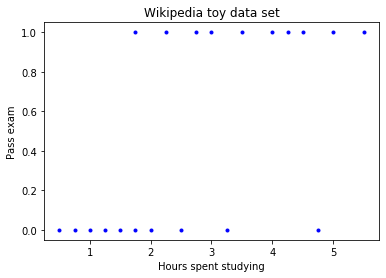

In [58]:
# Main library imports
import numpy as np
import matplotlib.pyplot as plt

# Data
## Inputs (Time in hours spent studying)
X = np.asarray([[0.50], [0.75], [1.00], [1.25], [1.50], [1.75], [3.00], [4.75],
                [1.75], [3.25], [5.00], [2.00], [2.25], [2.50], [2.75], [3.50], 
                [4.00], [4.25], [4.50], [5.50]])

## Outputs (Passed exam (1) or failed exam (0))
y = np.asarray([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1])

z = np.arange(-5, 5)
gz = 1/(1+np.exp(-z))
plt.plot(X, y, "b.")
plt.xlabel("Hours spent studying")
plt.ylabel("Pass exam")
plt.title("Wikipedia toy data set")
plt.show()

In [59]:
# Select 75% for training and 25% for testing
data_len = len(X)
indices = np.arange(0, data_len)

## use seed 1234 and shuffle
np.random.seed(123)
np.random.shuffle(indices)

## cutoff 25% through list
cutoff = round(0.25*data_len)
## training indices and testing indices
# 75% for training and 25% for testing
train_ids = indices[:-cutoff]
test_ids = indices[-cutoff:]

# Training and testing inputs and outputs
X_train = X[train_ids]
y_train = y[train_ids]
X_test = X[test_ids]
y_test = y[test_ids]

In [60]:
 class Logistic_regression:
    ''' Logistic regression binary classifier'''    
    def __init__(self, learn_rate=0.01, number_of_iterations=10000):
        # initialise variables
        self.lr = learn_rate
        self.n = number_of_iterations

    def logistic_regr_hypothesis(self, X, theta):
        ''' Takes data and theta values and calculates values for logsitic regression hypothesis 
            giving probabilities of two classes, 0 or 1.
            -------------
            takes:
                - X: data samples
                - theta: theta values
            returns:
                - gz: hypothesis values
            -----------
        '''
        # theta.transpose dot X
        z = np.dot(X, theta)
        # logistic function
        gz = 1/(1+np.exp(-z))
        return gz

    # Cross entropy loss function

    def loss_cross_entropy(self, h, y):
        ''' Calculates the cross entropy loss
            -----------
            takes:
                - h: logit predicted probabilties 
                - y: true values
            returns:
                - loss value
            -----------
        '''
        return sum(-y * np.log(h) - (1 - y) * np.log(1 - h))/len(y)


    def add_intecept(self, X):
        ''' Adds vector of ones for the intercept theta term
            -------------
            takes:
                - data values
            returns:
                - data with ones added
            -------------
        '''
        # Create a vector of ones the length of X and transpose 
        x1 = np.ones((X.shape[0], 1)).T
        # Concatenate and transpose
        return np.concatenate((x1, X.T)).T

    def logistic_regr_fit(self, X, y):
        ''' Finds optimum theta values for data set
            -------------
            takes:
                - X: inputs
                - y: outputs
                - lr: learning rate
            returns:
                - theta: list of theta values
                - loss: list of loss values
            -----------
        '''
        # Add intercept
        X = self.add_intecept(X)
        # initial theta
        self.theta = np.zeros(X.shape[1])
        # while delta_loss > loss_threshold
        # Loop n times
        self.loss = []
        for i in range(self.n):
            # Calculate hypothesis
            h = self.logistic_regr_hypothesis(X, self.theta)
            # Calculate gradient
            grad = np.dot(X.T, (h - y_train)) / y_train.shape[0]
            # Update rule
            self.theta = self.theta - grad*self.lr
            # Recalculate hypothesis
            h = self.logistic_regr_hypothesis(X, self.theta)
            # Calculate loss
            loss = self.loss_cross_entropy(h, y)
            self.loss.append(loss)
        return self.theta, self.loss
    
    def predict_probabilities(self, X):
        ''' Takes data and calculates class probabilities with model
            ------------
            takes:
                - X: 1D list of data values
            returns:
                - y_prob: list of probalities
        '''
        # Get probabilities
        self.y_prob = self.logistic_regr_hypothesis(self.add_intecept(X), self.theta)
        return self.y_prob
    
    def predict_class(self):
        ''' Returns predicted class using probalilities'''
        # Round probabilities ie. > 0.5 == 1, < 0.5 == 0
        return self.y_prob.round().astype(int)
        
        
    
model = Logistic_regression(learn_rate=0.1, number_of_iterations=3000)

%time theta, loss = model.logistic_regr_fit(X_train, y_train)
theta

CPU times: user 151 ms, sys: 0 ns, total: 151 ms
Wall time: 147 ms


array([-2.24755547,  0.83621764])

In [61]:
# Results
y_prob = model.predict_probabilities(X_test)
## Class values
y_pred = model.predict_class()
print("## Probability values: ", y_prob)
print("## Predicted class: ", y_pred)
print("## Ground truth: ", y_test)

## Probability values:  [0.16515078 0.56490605 0.81986364 0.19602313 0.4608276 ]
## Predicted class:  [0 1 1 0 0]
## Ground truth:  [0 1 1 0 0]


### [question 1]
Using a learning rate of 0.1 the algorithm seems to converge after about 1000-1500 iterations.

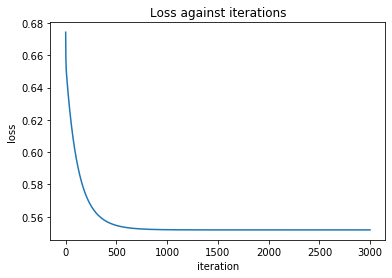

In [255]:
plt.plot(loss)
plt.title("Loss against iterations")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

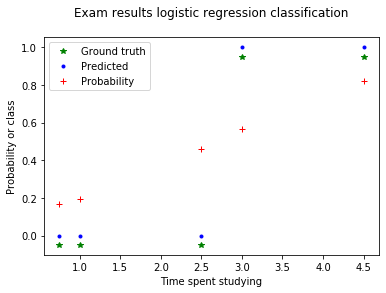

[[3 0]
 [0 2]]

accuracy: 1.00

class 0: precision: 1.00, recall: 1.00,  f-score: 1.00

class 1: precision: 1.00, recall: 1.00,  f-score: 1.00


In [63]:
from sklearn import metrics, linear_model

# Plot outputs
plt.plot(X_test, y_test-0.05,'g*')
plt.plot(X_test, y_pred,'b.')
plt.plot(X_test, y_prob, 'r+')
plt.legend(["Ground truth", "Predicted", "Probability"])
plt.xlabel("Time spent studying")
plt.ylabel("Probability or class")
plt.title("Exam results logistic regression classification\n")
plt.show()
?
# evaluation
print(metrics.confusion_matrix(y_test, y_pred))
print("\naccuracy: %.2f" % metrics.accuracy_score(y_test, y_pred))

# calculate precision and recall (and f-score, a weighted average of precision and recall) 
precision,recall,fscore,_ = metrics.precision_recall_fscore_support(y_test,y_pred )
for c in np.unique(y_test):
        print("\nclass %s: precision: %.2f, recall: %.2f,  f-score: %.2f" % (c, precision[c], recall[c], fscore[c]))

### [question 2]

If alpha (the learning rate) is too large the loss value seems to oscillate to varying degrees. This is due to overshooting the minimum and then overshooting back or looping around the minimum.  See figure below...

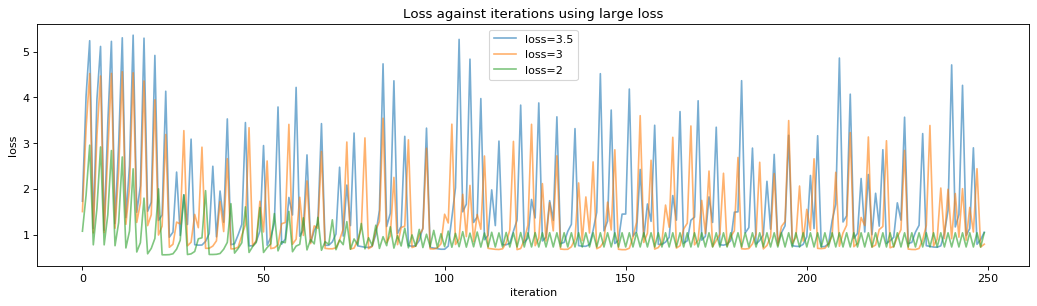

In [257]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 4), dpi=80, facecolor='w', edgecolor='k')
# Number of iterations
num_its = 250
# Trying out different learning rates and plotting

model = Logistic_regression(learn_rate=3.5, number_of_iterations=num_its)
theta, loss = model.logistic_regr_fit(X_train, y_train)
plt.plot(loss, alpha=0.6)

model = Logistic_regression(learn_rate=3, number_of_iterations=num_its)
theta, loss = model.logistic_regr_fit(X_train, y_train)
plt.plot(loss, alpha=0.6)

model = Logistic_regression(learn_rate=2, number_of_iterations=num_its)
theta, loss = model.logistic_regr_fit(X_train, y_train)
plt.plot(loss, alpha=0.6)

# Plot stuff
plt.title("Loss against iterations using large loss")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.legend(["loss=3.5", "loss=3", "loss=2"])
plt.show()

### [question 3]

Assume that you are applying logistic regression to the iris (flower)
dataset, as in the previous assignment. Answer the following questions:

#### (a) How would your hypothesis function change in this case and why?

The current hypothesis function works and with _n_ of features. As shown in code cell below this one...


#### (b) How would you utilize your implementation of logistic regression in order to perform (multi-class) classification on the iris dataset? 

I would implement a logistic regression method that would loop over each of a number of given classes and for each class do fit a logistic regression model via gradient descent. Then I would combine the models to give a multi class classifier. Pseudocode below:

```python

# Fit per class and save theta values
theta_per_class = []
for c in classes:
    theta_per_class.append(self.logistic_regression_fit(c.X, c.y))
    
y_probs = []
# For each theta set (ie model)
for theta in theta_per_class:
    # Find prediction probabilities and store
    y_probs.append([self.predict_probabilities(X, theta))

y_prob = []
# For each set of probabilities 
for i, y in enumerate(y_probs.T):
    # Find max and save
    y_probs.append(np.argmax(y))

    
    
```


In [258]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

model = Logistic_regression()
model.logistic_regr_hypothesis(X, np.zeros(X.shape[1]))

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])